In [23]:
from zipfile import ZipFile
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
file_name = 'dice_coeff_0_3'

In [52]:
zip_file_path = Path(f'/home/urbans50/Downloads/{file_name}.zip')
with ZipFile(zip_file_path) as zip_file:
    for name in zip_file.namelist():
        if 'validation' in name:
            with zip_file.open(name) as csv_file:
                val_pdf = pd.read_csv(csv_file, names=['time', 'dice_coeff'])
        else:
            with zip_file.open(name) as csv_file:
                train_pdf = pd.read_csv(csv_file, names=['time', 'dice_coeff'])

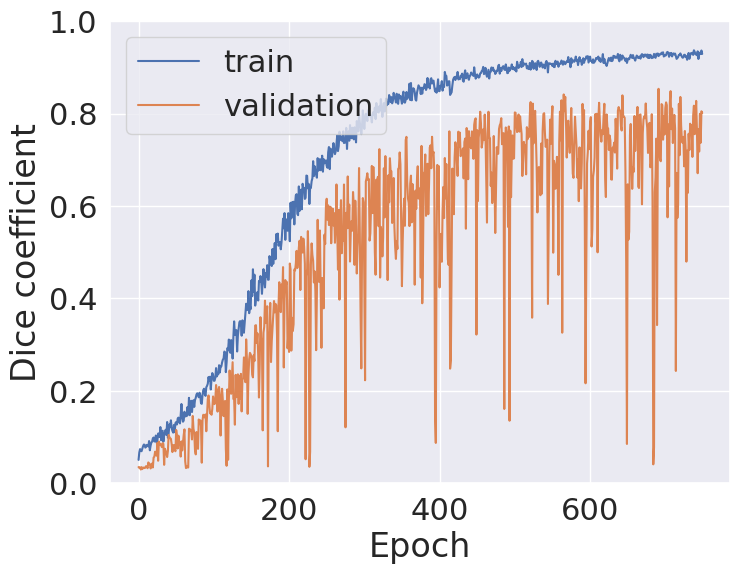

In [53]:
sns.set(font_scale=2, rc={'figure.figsize': (8,6)})
sns.lineplot(x=train_pdf.index, y=train_pdf['dice_coeff'])
sns.lineplot(x=val_pdf.index, y=val_pdf['dice_coeff'])
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Dice coefficient')
plt.savefig(f'/home/urbans50/{file_name}.svg')